# Custom Benchmarks

In [5]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-02-04 11:02:43


In [6]:
import os
import pandas as pd

directory = 'data'

train_csv = 'benchmark_train.csv'
test_csv = 'benchmark_test.csv'

train_df = pd.read_csv(os.path.join(directory, train_csv))
test_df = pd.read_csv(os.path.join(directory, test_csv))

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734 entries, 0 to 2733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RID                2734 non-null   int64  
 1   D1                 2734 non-null   int64  
 2   D2                 2734 non-null   int64  
 3   diagnosis          2734 non-null   object 
 4   ADAS13             2734 non-null   float64
 5   Ventricles         2734 non-null   float64
 6   CDRSB              2734 non-null   float64
 7   ADAS11             2734 non-null   float64
 8   MMSE               2734 non-null   float64
 9   RAVLT_immediate    2734 non-null   float64
 10  Hippocampus        2734 non-null   float64
 11  WholeBrain         2734 non-null   float64
 12  Entorhinal         2734 non-null   float64
 13  MidTemp            2734 non-null   float64
 14  APOE4              2734 non-null   float64
 15  AGE_AT_EXAM        2734 non-null   float64
 16  target_diagnosis   2734 

In [107]:
for name, df in {'train': train_df, 'test': test_df}.items():
    state_change_fraction = len(df[df.diagnosis != df.target_diagnosis]) / len(df)
    print(f'fraction of entries in {name} that correspond to diagnosis changes: {state_change_fraction:.2f}')

fraction of entries in train that correspond to diagnosis changes: 0.108
fraction of entries in test that correspond to diagnosis changes: 0.085


##  Predicting Diagnosis

In [83]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
train_df['encoded_diagnosis'] = oe.fit_transform(train_df['diagnosis'].to_numpy().reshape(-1, 1))

train_df['encoded_diagnosis'] = oe.fit_transform(train_df['diagnosis'].to_numpy().reshape(-1, 1))
test_df['encoded_diagnosis'] = oe.fit_transform(test_df['diagnosis'].to_numpy().reshape(-1, 1))

oe.categories_

[array(['AD', 'CN', 'MCI'], dtype=object)]

In [84]:
train_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles,encoded_diagnosis
0,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000,AD,30.00,88580.0,0.0
1,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289,AD,35.00,90099.0,0.0
2,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316,AD,37.67,97420.0,0.0
3,4,1,0,MCI,21.33,39605.0,1.0,14.33,27.0,37.0,6869.0,1154980.0,3983.0,19615.0,0.0,67.500000,MCI,25.33,39726.0,2.0
4,4,1,0,MCI,25.33,39726.0,0.5,17.33,28.0,33.0,6439.0,1116280.0,3711.0,20139.0,0.0,67.979124,MCI,22.00,38527.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,4272,1,1,MCI,17.00,34680.0,1.5,9.00,25.0,27.0,7082.0,987579.0,3524.0,18255.0,0.0,71.877413,MCI,15.00,36882.0,2.0
2730,4272,1,1,MCI,15.00,36882.0,1.5,8.00,25.0,23.0,6592.0,969429.0,3371.0,17373.0,0.0,72.416769,MCI,10.00,36237.0,2.0
2731,4274,1,0,MCI,9.00,25466.0,1.0,4.00,30.0,43.0,9180.0,1154790.0,3354.0,22141.0,1.0,63.000000,MCI,10.00,24430.0,2.0
2732,4275,1,1,CN,10.00,44838.0,0.0,6.00,29.0,48.0,7864.0,1230920.0,4084.0,25071.0,0.0,72.800000,CN,10.00,46542.0,1.0


In [89]:
x_features_1 = ['ADAS13', 'Ventricles', 'encoded_diagnosis']
x_features_2 = ['ADAS13', 'Ventricles', 'AGE_AT_EXAM', 'encoded_diagnosis']
x_features_3 = ['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate', 'Hippocampus',
                'WholeBrain', 'Entorhinal', 'MidTemp', 'AGE_AT_EXAM', 'encoded_diagnosis']

y_features = ['target_diagnosis']

train_x_1 = train_df[x_features_1]
train_x_2 = train_df[x_features_2]
train_x_3 = train_df[x_features_3]

train_y = train_df[y_features]

test_x_1 = test_df[x_features_1]
test_x_2 = test_df[x_features_2]
test_x_3 = test_df[x_features_3]

test_y = test_df[y_features]

### Train

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler_1 = StandardScaler()
scaler_2 = StandardScaler()
scaler_3 = StandardScaler()

svc_1 = SVC(random_state=42, probability=True)
svc_2 = SVC(random_state=42, probability=True)
svc_3 = SVC(random_state=42, probability=True)

scaled_svc_1 = Pipeline([
    ('scaler', scaler_1),
    ('svc', svc_1)
])

scaled_svc_2 = Pipeline([
    ('scaler', scaler_2),
    ('svc', svc_2)
])

scaled_svc_3 = Pipeline([
    ('scaler', scaler_3),
    ('svc', svc_3)
])

scaled_svc_1.fit(train_x_1, train_y)
scaled_svc_2.fit(train_x_2, train_y)
scaled_svc_3.fit(train_x_3, train_y)

//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/baylon/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [91]:
scaled_svc_1.classes_

array(['AD', 'CN', 'MCI'], dtype=object)

### Validation

In [92]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# one hot encode the target diagnosis
lb = LabelBinarizer()
target = lb.fit_transform(test_y)
# lb.classes_

preds_1 = scaled_svc_1.predict_proba(test_x_1)
preds_2 = scaled_svc_2.predict_proba(test_x_2)
preds_3 = scaled_svc_3.predict_proba(test_x_3)

roc_auc_score(target, preds_1, multi_class='ovo'), roc_auc_score(target, preds_2, multi_class='ovo'), roc_auc_score(target, preds_3, multi_class='ovo')

(0.9536830831323386, 0.9498780192815056, 0.9594744086717615)

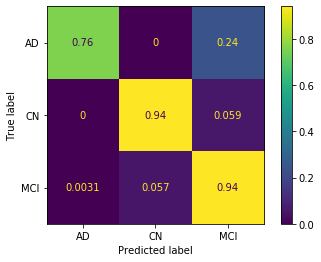

In [93]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(scaled_svc_1, test_x_1, test_y, normalize='true')

## Predicting ADAS13

## Predicting Ventricles